# Un aire no tan bueno

- Ortega Ibarra Jaime Jesús
- Martiñón Luna Jonathan José


## Importando librerías necesarias

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [117]:
!pip install descartes

## Leyendo los datos

### Indices por año


#### 2020

In [57]:
indice_2020 = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/imeca_2020.csv?raw=True')
indice_2020.head()

,Fecha,Hora,Noroeste ozono,Noroeste dióxido de azufre,Noroeste dióxido de nitrógeno,Noroeste monóxido de carbono,Noroeste PM10,Noroeste PM25,Noreste ozono,Noreste dióxido de azufre,...,Suroeste dióxido de nitrógeno,Suroeste monóxido de carbono,Suroeste PM10,Suroeste PM25,Sureste ozono,Sureste dióxido de azufre,Sureste dióxido de nitrógeno,Sureste monóxido de carbono,Sureste PM10,Sureste PM25
0,01/01/2020,1,4,36,17,9,81,63,9,28,...,16,5,35,54,9,8,17,12,73,72
1,01/01/2020,2,4,32,15,11,86,64,11,22,...,14,6,40,56,13,8,16,14,81,76
2,01/01/2020,3,4,26,16,12,91,66,9,18,...,15,6,49,59,13,8,15,15,91,80
3,01/01/2020,4,6,24,16,14,101,68,9,16,...,15,7,57,63,16,8,10,15,100,83
4,01/01/2020,5,5,22,15,15,104,72,5,16,...,14,7,64,67,16,8,9,14,102,83


In [58]:
indice_2020.shape

(8040, 32)

#### 2019

### Calidad del aire

In [59]:
calidad_aire = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/prueba_datos_calidad_aire.csv?raw=True')
calidad_aire.head()

,fecha_actualizacion,alcaldia_municipio,indice,riesgo,recomendacion_uno,recomendacion_dos,recomendacion_tres
0,2021-01-04 17:00:31,AZCAPOTZALCO,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
1,2021-01-04 17:00:31,BENITO JUAREZ,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
2,2021-01-04 17:00:31,COYOACAN,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
3,2021-01-04 17:00:31,CUAJIMALPA DE MORELOS,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
4,2021-01-04 17:00:31,CUAUHTEMOC,SIN COBERTURA,NaN,NaN,NaN,NaN


In [60]:
calidad_aire.shape

(46, 7)

In [61]:
set(calidad_aire['fecha_actualizacion'])

{'2021-01-04 17:00:31'}

In [62]:
set(calidad_aire['indice'])

{'BUENA', 'REGULAR', 'SIN COBERTURA'}

In [63]:
set(calidad_aire['riesgo'])

{'Aceptable', 'Sin riesgo', nan}

In [64]:
set(calidad_aire['recomendacion_uno'])

{'Puedes realizar actividades al aire libre', nan}

### Tiraderos clandestinos

In [65]:
tiraderos_clandestinos = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/tiraderos-clandestinos-al-cierre-de-2017.csv?raw=True')
tiraderos_clandestinos.head()

,Column 1,FID_,id_sedema,no_alcaldi,alcaldia,direccion_,tipo_tirad,calle,no_ext,no_int,colonia,entre_que_,longitud,latitud,geo_point
0,6,6,567,14,Benito Juarez,NaN,NaN,"Municipio Libre Es2Quina Miraflores, Colonia P...",NaN,NaN,PORTALES ORIENTE,NaN,-99.139980,19.367720,"19.36772,-99.13998"
1,41,41,402,9,Milpa Alta,NaN,NaN,Av. Hifalgo Y 2Ç÷ Cjon De Independencia,NaN,NaN,SAN PEDRO ATOCPAN,NaN,-99.042876,19.203210,"19.2032099,-99.0428762"
2,78,78,508,11,Tlahuac,NaN,NaN,Angƒ??lica Paulet,NaN,NaN,LA NOPALERA,NaN,-99.055393,19.296997,"19.296997,-99.055393"
3,81,81,62,3,Coyoacan,NaN,NaN,Bodega De Barrido Manual Santa Cecilia,NaN,NaN,CTM SECCIÇÿN 10,NaN,-99.107160,19.300200,"19.3002,-99.1071599"
4,83,83,498,11,Tlahuac,NaN,NaN,Av. Tl¶ÿ¶Huac,NaN,NaN,LA NOPALERA,NaN,-99.054197,19.302147,"19.302147,-99.054197"


In [66]:
tiraderos_clandestinos['alcaldia'].value_counts()

Cuauhtemoc             274
Iztapalapa             219
Benito Juarez          147
Venustiano Carranza    109
Alvaro Obregon          77
Miguel Hidalgo          69
Coyoacan                68
Iztacalco               47
Azcapotzalco            47
Tlahuac                 35
Milpa Alta              13
Xochimilco              12
Magdalena Contreras      5
Cuajimalpa               5
Tlalpan                  2
Name: alcaldia, dtype: int64

/home/joiortega1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


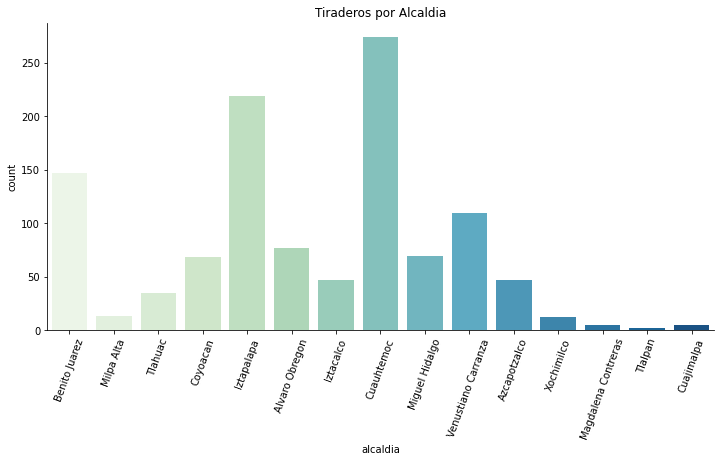

In [67]:
tiraderos_alcaldias = sns.factorplot("alcaldia", data=tiraderos_clandestinos, 
                                     aspect=2, kind="count", palette="GnBu", 
                                     margin_titles=True)
plt.title("Tiraderos por Alcaldia")
tiraderos_alcaldias.set_xticklabels(rotation=70) 

### Niveles de plomo en el aire

In [68]:
nivel_plomo = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/red_manual_plomo.csv?raw=True'
                          ,skiprows=8)
nivel_plomo.head()

,Date,cve_station,cve_parameter,value,unit
0,08/01/1989,CES,PbPST,1.55,2
1,08/01/1989,MER,PbPST,2.69,2
2,08/01/1989,PED,PbPST,0.87,2
3,08/01/1989,TLA,PbPST,1.41,2
4,08/01/1989,XAL,PbPST,3.17,2


### Afluencia en Transporte público

In [69]:
url = 'https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/afluencia-preliminar-en-transporte-publico.csv?raw=true'
afluencia_transport = pd.read_csv(url)
afluencia_transport.head()

,FECHA,DÍA MES,DÍA SEMANA,MES,AÑO,ORGANISMO,LINEA/SERVICIO,AFLUENCIA TARJETA,AFLUENCIA BOLETO,AFLUENCIA TOTAL (cifras preliminares)
0,2020-03-01,1,Domingo,2020-03,2020,Ecobici,NaN,NaN,NaN,11238.0
1,2020-03-02,2,Lunes,2020-03,2020,Ecobici,NaN,NaN,NaN,29475.0
2,2020-03-04,4,Miércoles,2020-03,2020,Ecobici,NaN,NaN,NaN,31477.0
3,2020-03-05,5,Jueves,2020-03,2020,Ecobici,NaN,NaN,NaN,31493.0
4,2020-03-06,6,Viernes,2020-03,2020,Ecobici,NaN,NaN,NaN,29035.0


### Escuelas por zona

Escuelas públicas

In [70]:
url = 'https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/Escuelas/escuelas-publicas.csv?raw=true'
escuelas_publicas = pd.read_csv(url)
escuelas_publicas.head()

,Nombre,Domicilio con nombre,Coordenadas,Latitud,Longitud,Geopoint,Domicilio
0,TELESECUNDARIA 63,DOMICILIO: ADMON U HAB CAMPAÑA DEL EBANO Y C C...,"-99.05424199980791,19.35316300009179,0",19.353163,-99.054242,"19.3531630001,-99.0542419998","ADMON U HAB CAMPAÑA DEL EBANO Y C CELAYA S/N, ..."
1,PREESCOLAR GENERAL CON SERVICIO ASISTENCIAL - ...,"DOMICILIO: PLAYA FLAMINGOS NO 1, MILITAR MARTE...","-99.12558263181295,19.37922441798433,0",19.379224,-99.125583,"19.379224418,-99.1255826318","PLAYA FLAMINGOS NO 1, MILITAR MARTE, DELEGACIO..."
2,PREESCOLAR GENERAL - ESTADO DE ZACATECAS,"DOMICILIO: CANAL DE SAN JUAN Y SUR 14 C, AGRIC...","-99.05933678879129,19.39268897307597,0",19.392689,-99.059337,"19.3926889731,-99.0593367888","CANAL DE SAN JUAN Y SUR 14 C, AGRICOLA ORIENTA..."
3,PRIMARIA GENERAL - PROFRA. AMANDA PALAFOX Y BAZ,"DOMICILIO: MONTE ELBRUZ NO 15, LOS VOLCANES, D...","-99.17674771482122,19.2697621281349,0",19.269762,-99.176748,"19.2697621281,-99.1767477148","MONTE ELBRUZ NO 15, LOS VOLCANES, DELEGACION T..."
4,PRIMARIA GENERAL - VALENTIN ZAMORA OROZCO,"DOMICILIO: RETORNO 33 Y 34 S/N, AVANTE, DELEGA...","-99.13093319192899,19.32847431855964,0",19.328474,-99.130933,"19.3284743186,-99.1309331919","RETORNO 33 Y 34 S/N, AVANTE, DELEGACION COYOAC..."


In [71]:
escuelas_publicas.shape

(2383, 7)

In [72]:
delegacion = []
for i in range(len(escuelas_publicas)):
    if type(escuelas_publicas['Domicilio'][i]) != float:
        deleg = escuelas_publicas['Domicilio'][i].split("DELEGACION")
        if len(deleg) > 1:
            delegacion.append(deleg[1].split(',')[0])
        else:
            delegacion.append('NO DISPONIBLE')      
    else:
        delegacion.append('NO DISPONIBLE')

In [73]:
escuelas_publicas['Delegacion'] = delegacion

/home/joiortega1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


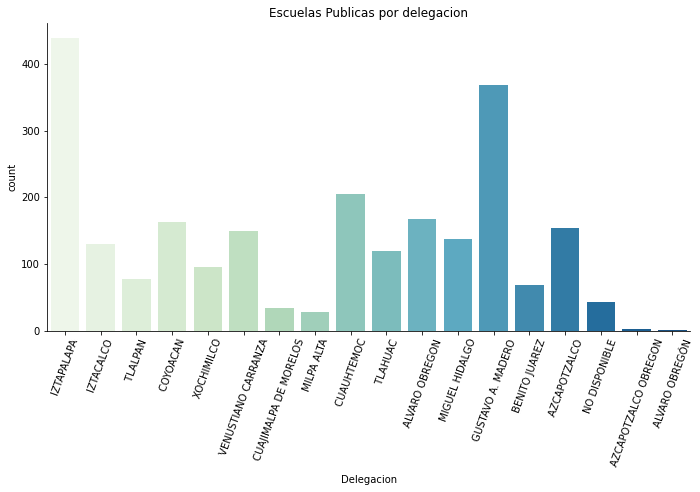

In [81]:
escuelas_publicas_alcaldia = sns.factorplot("Delegacion", data=escuelas_publicas, 
                                     aspect=2, kind="count", palette="GnBu", 
                                     margin_titles=True)
plt.title("Escuelas Publicas por delegacion")
escuelas_publicas_alcaldia.set_xticklabels(rotation=70) 

Escuelas privadas

In [16]:
url = 'https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/Escuelas/escuelas-privadas.csv?raw=true'
escuelas_privadas = pd.read_csv(url)
escuelas_privadas.head()

,NIVEL,NOMBRE,TURNO,DOMICILIO,COLONIA,ALCALDÍA,SOSTENIMIENTO,ubicacion,lat,lon,coordenadas
0,INICIAL,CENDI PART SEDI LOMAS,MATUTINO,EXPLANADA NO. 305,LOMAS DE CHAPULTEPEC,MIGUEL HIDALGO,Particular,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",19.425154,-99.211154,"19.4251542,-99.211154"
1,INICIAL,ARMONIA INFANTIL,MATUTINO,AV. SINATEL No 38 MZ. 4 LT. 21,SINATEL AMPLIACION,IZTAPALAPA,Particular,"AV. SINATEL No 38 MZ. 4 LT. 21, SINATEL AMPLIA...",19.364828,-99.131801,"19.3648281,-99.1318013"
2,INICIAL,CENDI PART. COLEGIO DE LAS BALEARES,TIEMPO COMPLETO,JOSEFA ORTIZ DE DOMINGUEZ NO 2,TIZAPAN,ALVARO OBREGON,Particular,"JOSEFA ORTIZ DE DOMINGUEZ NO 2, TIZAPAN, ALVAR...",19.335167,-99.202637,"19.3351668,-99.202637"
3,INICIAL,"CENDI PART COLEGIO CIBELES, S.C.",MATUTINO,RIO GRIJALVA NUM 27,CUAUHTEMOC,CUAUHTEMOC,Particular,"RIO GRIJALVA NUM 27, CUAUHTEMOC, CUAUHTEMOC",19.433640,-99.170147,"19.4336398,-99.1701471"
4,INICIAL,CENTRO DE DESARROLLO INFANTIL KINDERGARDEN,TIEMPO COMPLETO,CALLE 11 DE ENERO DE 1861 NO. 2114,LEYES DE REFORMA,IZTAPALAPA,Particular,"CALLE 11 DE ENERO DE 1861 NO. 2114, LEYES DE R...",19.382636,-99.066102,"19.3826355,-99.0661015"


/home/joiortega1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


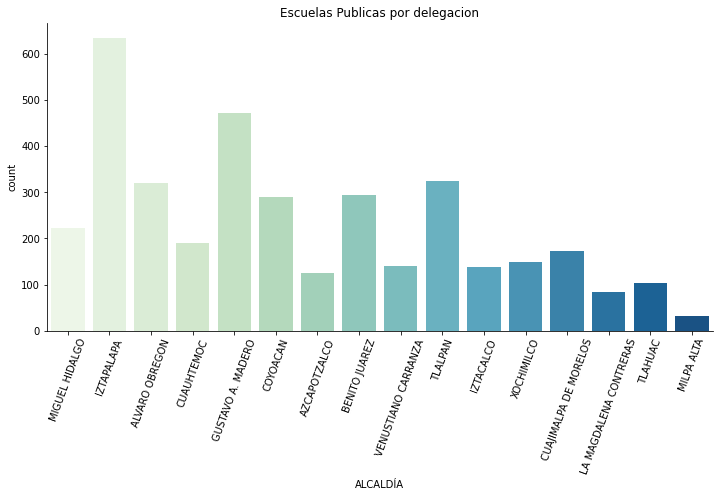

In [80]:
escuelas_privadas_alcaldia = sns.factorplot("ALCALDÍA", data=escuelas_privadas, 
                                     aspect=2, kind="count", palette="GnBu", 
                                     margin_titles=True)
plt.title("Escuelas Publicas por delegacion")
escuelas_privadas_alcaldia.set_xticklabels(rotation=70) 

### Mercados públicos por zona

In [79]:
mercados = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/mercados-publicos.csv?raw=True')
mercados.head()

,numero,alcaldia,nombre mercado,numero oficial,numero de locales,latitud,longitud,coord
0,21.0,AZCAPOTZALCO,COSMOPOLITA,138.0,135.0,19.475223,-99.161796,"19.4752229147,-99.1617959999"
1,35.0,AZCAPOTZALCO,VICTORIA DE LAS DEMOCRACIAS,141.0,177.0,19.467591,-99.163067,"19.4675909147,-99.1630669999"
2,26.0,AZCAPOTZALCO,OBRERO POPULAR,142.0,125.0,19.463233,-99.173568,"19.4632329148,-99.1735679999"
3,19.0,AZCAPOTZALCO,BENITO JUAREZ,167.0,123.0,19.475726,-99.176803,"19.4757259147,-99.1768029999"
4,70.0,COYOACAN,SANTA URSULA COAPA (PESCADITOS),154.0,268.0,19.311774,-99.150337,"19.3117739152,-99.1503369999"


/home/joiortega1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


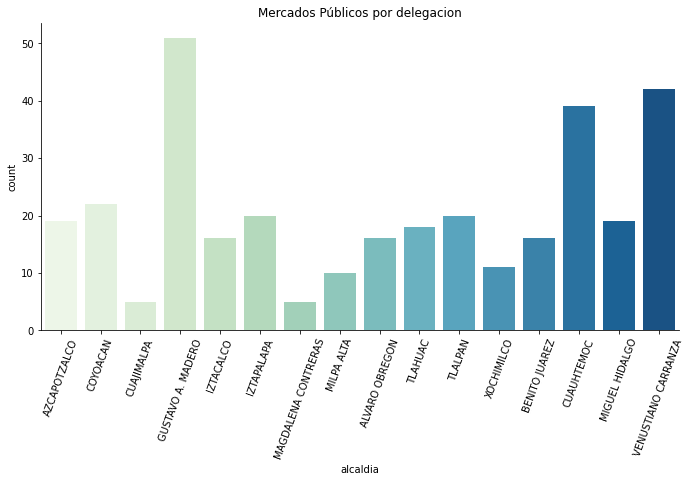

In [82]:
mercados_alcaldias = sns.factorplot("alcaldia", data=mercados, 
                                     aspect=2, kind="count", palette="GnBu", 
                                     margin_titles=True)
plt.title("Mercados Públicos por delegacion")
mercados_alcaldias.set_xticklabels(rotation=70)

### Indices de Parquímetros

In [83]:
parquimetros = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/prueba-parquimetros.csv?raw=True')
parquimetros.head()

,Alcaldía,Polígono,Colonia,Año,Mes,Ingreso por Estacionamiento en Vía Pública,Contraprestación 30% (F),Ingreso por Retiro de Candado Inmovilizador,70% Inmovilizador (H),Pago al GCDMX (F-H)
0,Miguel Hidalgo,Polanco,Palmitas,2012,Febrero,204270.0,61281.0,0.0,0.0,61281.0
1,Miguel Hidalgo,Polanco,Los Morales,2012,Junio,464162.0,139248.6,0.0,0.0,139248.6
2,Miguel Hidalgo,Polanco,Rincón del Bosque,2012,Junio,99802.0,29940.6,0.0,0.0,29940.6
3,Miguel Hidalgo,Polanco,Morales Secc. Palmas,2012,Junio,337447.0,101234.1,0.0,0.0,101234.1
4,Miguel Hidalgo,Polanco,Polanco Reforma,2012,Julio,1133326.0,339997.8,0.0,0.0,339997.8


In [108]:
#Por alguna razon no muestra
#parquimetros["Colonia"]

/home/joiortega1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


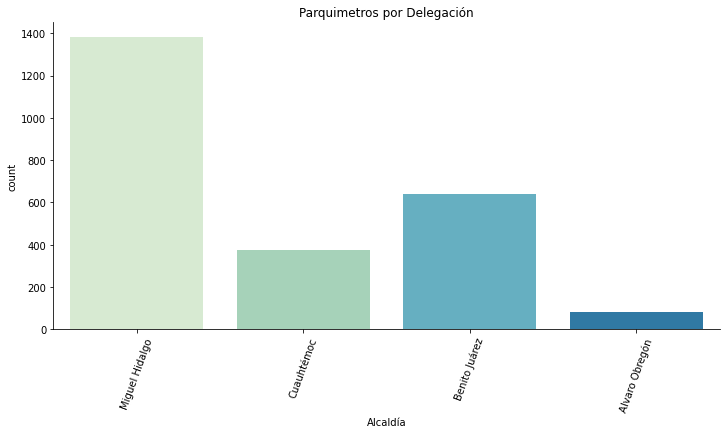

In [84]:
parquimetros_alcaldia = sns.factorplot("Alcaldía", data=parquimetros, 
                                     aspect=2, kind="count", palette="GnBu", 
                                     margin_titles=True)
plt.title("Parquimetros por Delegación")
parquimetros_alcaldia.set_xticklabels(rotation=70)

### Areas Verdes CDMX

In [101]:
url = 'https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/cdmx_areas_verdes_2017.csv?raw=True'
areas_verdes = pd.read_csv(url)
areas_verdes.head()

,Geo Point,Geo Shape,muerdago,p_sp_her_d,zonifica,subcat_sed,subcve_sed,p_manejo,tipo,p_sp_abs_d,...,p_sp_arb_d,p_herbaceo,p_sp_do_mu,p_arboreo,categoria_,superficie,e_urbano,perimetro,cve_sedema,responsabl
0,"19.4877568178,-99.2060645931","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Panteones,604.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,6660.027554,NaN,329.264738,600,NaN
1,"19.3887689803,-99.116393168","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Deportivos,601.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,2917.257837,NaN,272.243614,600,NaN
2,"19.3928871121,-99.0869912505","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Camellones centrales y laterales,203.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Áreas verdes complementarias o ligadas a la re...,1086.305646,NaN,425.043656,200,NaN
3,"19.383106069,-99.1073609486","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Unidades habitacionales,602.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,3605.704046,NaN,269.209436,600,NaN
4,"19.3822134465,-99.1028423436","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Unidades habitacionales,602.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,19619.361577,NaN,798.409227,600,NaN


In [106]:
areas_verdes['delegacion'].value_counts()

Iztapalapa               2129
Coyoacán                 1806
Azcapotzalco              960
Miguel Hidalgo            925
Gustavo A. Madero         835
Tlalpan                   735
Álvaro Obregón            721
Venustiano Carranza       634
Tláhuac                   581
Cuauhtémoc                567
Benito Juárez             484
Cuajimalpa de Morelos     448
Iztacalco                 386
Magdalena Contreras       202
Xochimilco                196
Milpa Alta                130
Name: delegacion, dtype: int64

/home/joiortega1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


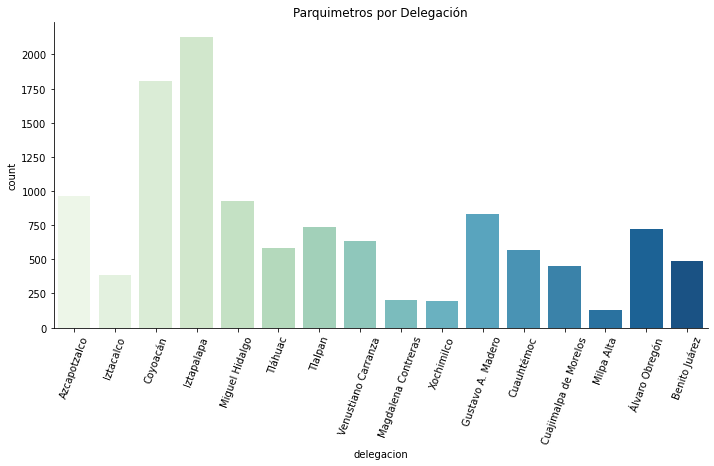

In [107]:
areas_verdes_delegacion = sns.factorplot("delegacion", data=areas_verdes, 
                                     aspect=2, kind="count", palette="GnBu", 
                                     margin_titles=True)
plt.title("Parquimetros por Delegación")
areas_verdes_delegacion.set_xticklabels(rotation=70)

In [97]:
areas_verdes['Geo Shape'][1]

'{"type": "MultiPolygon", "coordinates": [[[[-99.11678804338746, 19.389035577395834], [-99.11637228211686, 19.388873052535505], [-99.11608502887533, 19.388823917112617], [-99.11590738542336, 19.388823917112617], [-99.11582801281715, 19.388816357816783], [-99.11585069070463, 19.38872942591474], [-99.11585447035255, 19.388650053308538], [-99.11585447035255, 19.388627375421056], [-99.11607746957951, 19.388623595773133], [-99.11682961951452, 19.388642494012707], [-99.11678804338746, 19.389035577395834]]]]}'

In [164]:
datos = "https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/cdmx_areas_verdes_2017.geojson?raw=True"
map_data = gpd.read_file(datos)
map_data.head()

,muerdago,categoria,p_manejo,cve_sedema,subcat_sed,direccion,subcve_sed,gid,cve_delg,superficie,...,p_sp_her_d,p_herbaceo,p_sp_do_mu,p_sp_arb_d,p_sp_abs_d,p_arboreo,p_arbustiv,tipo,responsabl,geometry
0,Ausencia,Áreas verdes complementarias o ligadas a la re...,NA,200,Camellones centrales y laterales,Joyas,203,427,7,524.826776485,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.11039 19.47311, -99.11124 ..."
1,Ausencia,Áreas verdes complementarias o ligadas a la re...,NA,200,Camellones centrales y laterales,Viena,203,1238,4,2986.22013973,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.16022 19.35798, -99.15520 ..."
2,Ausencia,Áreas verdes complementarias o ligadas a la re...,NA,200,Camellones centrales y laterales,Texcoco,203,463,7,7719.22948874,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.06610 19.44710, -99.06525 ..."
3,Ausencia,"Parques, arboledas y alamedas",NA,400,Parques,Poniente 6,401,464,7,2301.03245939,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.06236 19.44824, -99.06237 ..."
4,Ausencia,Áreas verdes complementarias o ligadas a la re...,NA,200,Camellones centrales y laterales,Avenida 606,203,494,7,6799.59197474,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.05681 19.45814, -99.05677 ..."


In [165]:
list(map_data)

['muerdago',
 'categoria',
 'p_manejo',
 'cve_sedema',
 'subcat_sed',
 'direccion',
 'subcve_sed',
 'gid',
 'cve_delg',
 'superficie',
 'perimetro',
 'delegacion',
 'nombre',
 'ubicacion',
 'p_sp_her_d',
 'p_herbaceo',
 'p_sp_do_mu',
 'p_sp_arb_d',
 'p_sp_abs_d',
 'p_arboreo',
 'p_arbustiv',
 'tipo',
 'responsabl',
 'geometry']

In [166]:
map_data['geometry']

0        MULTIPOLYGON (((-99.11039 19.47311, -99.11124 ...
1        MULTIPOLYGON (((-99.16022 19.35798, -99.15520 ...
2        MULTIPOLYGON (((-99.06610 19.44710, -99.06525 ...
3        MULTIPOLYGON (((-99.06236 19.44824, -99.06237 ...
4        MULTIPOLYGON (((-99.05681 19.45814, -99.05677 ...
5        MULTIPOLYGON (((-99.13552 19.47262, -99.13533 ...
6        MULTIPOLYGON (((-99.07732 19.45048, -99.07733 ...
7        MULTIPOLYGON (((-98.99457 19.17286, -98.99453 ...
8        MULTIPOLYGON (((-99.11612 19.32199, -99.11607 ...
9        MULTIPOLYGON (((-99.14226 19.35296, -99.14259 ...
10       MULTIPOLYGON (((-99.17867 19.33323, -99.17863 ...
11       MULTIPOLYGON (((-99.11173 19.31105, -99.11245 ...
12       MULTIPOLYGON (((-99.04699 19.29360, -99.04685 ...
13       MULTIPOLYGON (((-99.13017 19.35815, -99.13016 ...
14       MULTIPOLYGON (((-99.00361 19.26925, -99.00361 ...
15       MULTIPOLYGON (((-99.17927 19.30749, -99.17868 ...
16       MULTIPOLYGON (((-98.96637 19.31186, -98.96602 .

In [167]:
map_data['delegacion'].value_counts()

Iztapalapa               2129
Coyoacán                 1806
Azcapotzalco              960
Miguel Hidalgo            925
Gustavo A. Madero         835
Tlalpan                   735
Álvaro Obregón            721
Venustiano Carranza       634
Tláhuac                   581
Cuauhtémoc                567
Benito Juárez             484
Cuajimalpa de Morelos     448
Iztacalco                 386
Magdalena Contreras       202
Xochimilco                196
Milpa Alta                130
Name: delegacion, dtype: int64

In [168]:
areas_delegacion = map_data.loc[:, ['geometry', 'delegacion']]

<AxesSubplot:title={'center':'Areas Verdes CDMX'}>

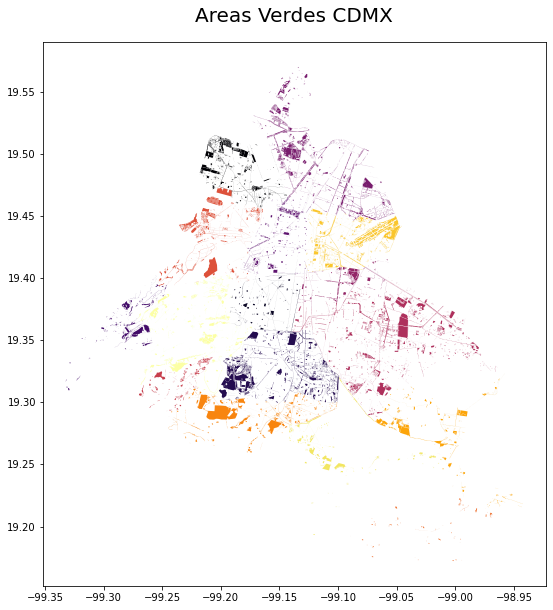

In [169]:
fig, ax = plt.subplots(1,1, figsize=(15, 10))

ax.set_title('Areas Verdes CDMX', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': 'black'})


divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)

areas_delegacion.plot(column='delegacion', cmap='inferno', ax=ax, legend=False)
#plt.savefig("mapa_calor.svg", transparent=True)

### Contador de ciclistas CDMX 

In [135]:
ciclistas = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/contador-ciclistas.csv?raw=True')
ciclistas.head()

,Día de la semana,Día,Mes,Año,Contador Ruta Reforma222,Contador Ruta Revolución,Contador Ruta Patriotismo
0,jueves,5,diciembre,2013,2516.0,NaN,NaN
1,lunes,9,diciembre,2013,2132.0,NaN,NaN
2,viernes,22,junio,2018,2913.0,980.0,1163.0
3,martes,10,julio,2018,2531.0,877.0,1013.0
4,sábado,7,julio,2018,1534.0,616.0,584.0


In [137]:
ciclistas['Año'].value_counts()

2016    366
2017    365
2015    365
2014    365
2018    351
2020    304
2019    273
2013     46
Name: Año, dtype: int64

In [141]:
ciclistas_2020 = ciclistas[ciclistas["Año"] == 2020]
ciclistas_2020.head()

,Día de la semana,Día,Mes,Año,Contador Ruta Reforma222,Contador Ruta Revolución,Contador Ruta Patriotismo
2131,sabado,1,febrero,2020,1890.0,124.0,648.0
2132,viernes,7,febrero,2020,3778.0,226.0,1347.0
2133,sábado,15,febrero,2020,1939.0,153.0,677.0
2134,lunes,17,febrero,2020,3575.0,289.0,1284.0
2135,miércoles,19,febrero,2020,4058.0,287.0,1447.0


In [150]:
ciclistas_2019 = ciclistas[ciclistas["Año"] == 2019]
ciclistas_2019.head()

,Día de la semana,Día,Mes,Año,Contador Ruta Reforma222,Contador Ruta Revolución,Contador Ruta Patriotismo
8,martes,28,mayo,2019,4015.0,1125.0,1416.0
37,viernes,4,enero,2019,3133.0,662.0,846.0
123,viernes,3,mayo,2019,3821.0,1079.0,1261.0
124,domingo,10,febrero,2019,2131.0,655.0,651.0
125,domingo,3,febrero,2019,1909.0,337.0,566.0


In [159]:
ciclistas_2020_mes = ciclistas_2020[["Mes", "Contador Ruta Reforma222",
                "Contador Ruta Revolución", 
                "Contador Ruta Patriotismo"]].groupby(['Mes']).sum()

In [160]:
ciclistas_2019_mes = ciclistas_2019[["Mes", "Contador Ruta Reforma222",
                "Contador Ruta Revolución", 
                "Contador Ruta Patriotismo"]].groupby(['Mes']).sum()

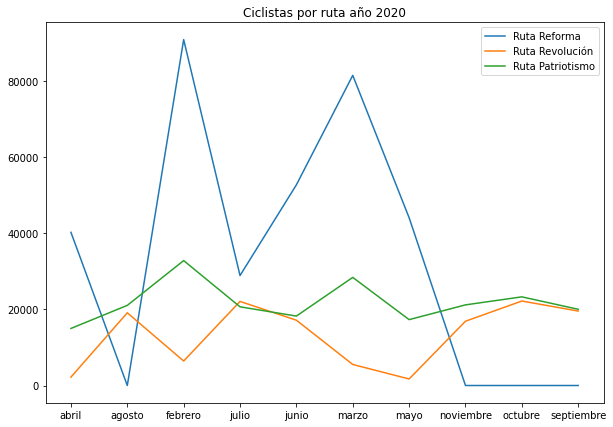

In [162]:
plt.figure(figsize=(10,7))
plt.plot(ciclistas_2020_mes["Contador Ruta Reforma222"], label = 'Ruta Reforma')
plt.plot(ciclistas_2020_mes["Contador Ruta Revolución"], label = 'Ruta Revolución')
plt.plot(ciclistas_2020_mes["Contador Ruta Patriotismo"], label = 'Ruta Patriotismo')
plt.title("Ciclistas por ruta año 2020")
plt.legend()

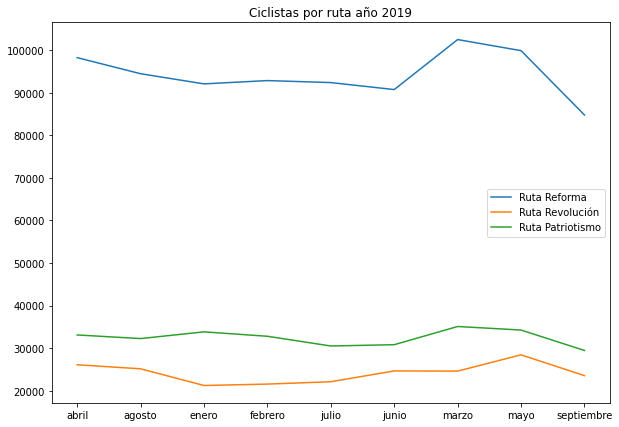

In [163]:
plt.figure(figsize=(10,7))
plt.plot(ciclistas_2019_mes["Contador Ruta Reforma222"], label = 'Ruta Reforma')
plt.plot(ciclistas_2019_mes["Contador Ruta Revolución"], label = 'Ruta Revolución')
plt.plot(ciclistas_2019_mes["Contador Ruta Patriotismo"], label = 'Ruta Patriotismo')
plt.title("Ciclistas por ruta año 2019")
plt.legend()

Podemos observar que la ruta que predomina es la ruta de reforma la cual abarca las delegaciones **Cuauhtémoc y Miguel Hidalgo**